## Import dependencies

In [1]:
import numpy as np
from landlab import RasterModelGrid
from landlab.components import FlowAccumulator
from landlab.components import DepressionFinderAndRouter
from landlab.components import ErosionDeposition
from landlab.components import FastscapeEroder, StreamPowerEroder
from landlab.io import read_esri_ascii
from landlab.plot.imshow import imshow_grid_at_node
from landlab.plot.graph import plot_graph
np.random.seed(seed = 5000)
import matplotlib.pyplot as plt
%matplotlib inline

## Load DEM

In [4]:
(mg_origin, z) = read_esri_ascii("bacia_piratini_90m_csv.asc", name="topographic__elevation")

(mg, z) = read_esri_ascii("bacia_piratini_90m_csv.asc", name="topographic__elevation")
mg.at_node.keys()

['topographic__elevation']

In [6]:
mg.at_node["topographic__elevation"]

array([ 400.,  386.,  373., ...,  283.,  279.,  277.])

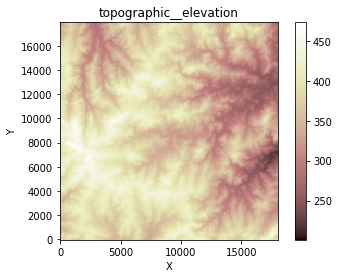

In [24]:
imshow_grid_at_node(mg,'topographic__elevation')

## Set boundary

In [25]:
mg.set_closed_boundaries_at_grid_edges(bottom_is_closed=True, left_is_closed=True, right_is_closed=True, top_is_closed=True)

In [26]:
mg.set_watershed_boundary_condition_outlet_id(0,mg['node']['topographic__elevation'], -9999.)

## Initialize Components

In [7]:
fr = FlowAccumulator(mg, flow_director='D8')
# df = DepressionFinderAndRouter(mg)
fsc = FastscapeEroder(mg, K_sp=.001, m_sp=.5,n_sp=1)

In [8]:
ed = ErosionDeposition(
...     mg,
...     K=0.00001,
...     v_s=0.001,
...     m_sp=0.5,
...     n_sp = 1.0,
...     sp_crit=0)

## Run model

In [29]:
fsc_dt = 100.
ed_dt = 1.

In [36]:
# for x in range(50):
#     print("Step: {}".format(x))
#     stream_power.run_one_step(1.)

Step: 0


IndexError: Out of bounds on buffer access (axis 0)

In [204]:
for x in range(50):
    print("Step: {}".format(x))
    fr.run_one_step()
#     print("FR: {}".format(x))
#     df.map_depressions()
#     print("DF: {}".format(x))
    flooded = np.where(df.flood_status==3)[0]
    fsc.run_one_step(dt = fsc_dt)
#     mg.at_node['topographic__elevation'][0] -= 0.001 #uplift
    

Step: 0
FR: 0
Step: 1
FR: 1
Step: 2
FR: 2
Step: 3
FR: 3
Step: 4
FR: 4
Step: 5
FR: 5
Step: 6
FR: 6
Step: 7
FR: 7
Step: 8
FR: 8
Step: 9
FR: 9
Step: 10
FR: 10
Step: 11
FR: 11
Step: 12
FR: 12
Step: 13
FR: 13
Step: 14
FR: 14
Step: 15
FR: 15
Step: 16
FR: 16
Step: 17
FR: 17
Step: 18
FR: 18
Step: 19
FR: 19
Step: 20
FR: 20
Step: 21
FR: 21
Step: 22
FR: 22
Step: 23
FR: 23
Step: 24
FR: 24
Step: 25
FR: 25
Step: 26
FR: 26
Step: 27
FR: 27
Step: 28
FR: 28
Step: 29
FR: 29
Step: 30
FR: 30
Step: 31
FR: 31
Step: 32
FR: 32
Step: 33
FR: 33
Step: 34
FR: 34
Step: 35
FR: 35
Step: 36
FR: 36
Step: 37
FR: 37
Step: 38
FR: 38
Step: 39
FR: 39
Step: 40
FR: 40
Step: 41
FR: 41
Step: 42
FR: 42
Step: 43
FR: 43
Step: 44
FR: 44
Step: 45
FR: 45
Step: 46
FR: 46
Step: 47
FR: 47
Step: 48
FR: 48
Step: 49
FR: 49


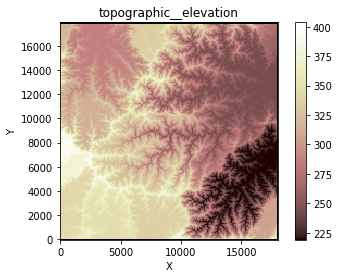

In [205]:
imshow_grid_at_node(mg,'topographic__elevation')

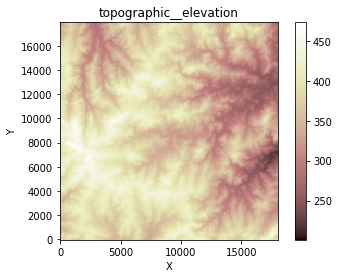

In [206]:
imshow_grid_at_node(mg_origin,'topographic__elevation')

In [187]:
for x in range(1000): #E/D component loop
    print("Step: {}".format(x))
    fr.run_one_step()
    #df.map_depressions()
#     print("ed: {}".format(x))
    ed.run_one_step(dt = ed_dt)
#     mg.at_node['topographic__elevation'][0] -= 2e-4 * ed_dt

Step: 0
ed: 0
Step: 1
ed: 1
Step: 2
ed: 2
Step: 3
ed: 3
Step: 4
ed: 4
Step: 5
ed: 5
Step: 6
ed: 6
Step: 7
ed: 7
Step: 8
ed: 8
Step: 9
ed: 9
Step: 10
ed: 10
Step: 11
ed: 11
Step: 12
ed: 12
Step: 13
ed: 13
Step: 14
ed: 14
Step: 15
ed: 15
Step: 16
ed: 16
Step: 17
ed: 17
Step: 18
ed: 18
Step: 19
ed: 19
Step: 20
ed: 20
Step: 21
ed: 21
Step: 22
ed: 22
Step: 23
ed: 23
Step: 24
ed: 24
Step: 25
ed: 25
Step: 26
ed: 26
Step: 27
ed: 27
Step: 28
ed: 28
Step: 29
ed: 29
Step: 30
ed: 30
Step: 31
ed: 31
Step: 32
ed: 32
Step: 33
ed: 33
Step: 34
ed: 34
Step: 35
ed: 35
Step: 36
ed: 36
Step: 37
ed: 37
Step: 38
ed: 38
Step: 39
ed: 39
Step: 40
ed: 40
Step: 41
ed: 41
Step: 42
ed: 42
Step: 43
ed: 43
Step: 44
ed: 44
Step: 45
ed: 45
Step: 46
ed: 46
Step: 47
ed: 47
Step: 48
ed: 48
Step: 49
ed: 49
Step: 50
ed: 50
Step: 51
ed: 51
Step: 52
ed: 52
Step: 53
ed: 53
Step: 54
ed: 54
Step: 55
ed: 55
Step: 56
ed: 56
Step: 57
ed: 57
Step: 58
ed: 58
Step: 59
ed: 59
Step: 60
ed: 60
Step: 61
ed: 61
Step: 62
ed: 62
Step: 63
ed:

ed: 468
Step: 469
ed: 469
Step: 470
ed: 470
Step: 471
ed: 471
Step: 472
ed: 472
Step: 473
ed: 473
Step: 474
ed: 474
Step: 475
ed: 475
Step: 476
ed: 476
Step: 477
ed: 477
Step: 478
ed: 478
Step: 479
ed: 479
Step: 480
ed: 480
Step: 481
ed: 481
Step: 482
ed: 482
Step: 483
ed: 483
Step: 484
ed: 484
Step: 485
ed: 485
Step: 486
ed: 486
Step: 487
ed: 487
Step: 488
ed: 488
Step: 489
ed: 489
Step: 490
ed: 490
Step: 491
ed: 491
Step: 492
ed: 492
Step: 493
ed: 493
Step: 494
ed: 494
Step: 495
ed: 495
Step: 496
ed: 496
Step: 497
ed: 497
Step: 498
ed: 498
Step: 499
ed: 499
Step: 500
ed: 500
Step: 501
ed: 501
Step: 502
ed: 502
Step: 503
ed: 503
Step: 504
ed: 504
Step: 505
ed: 505
Step: 506
ed: 506
Step: 507
ed: 507
Step: 508
ed: 508
Step: 509
ed: 509
Step: 510
ed: 510
Step: 511
ed: 511
Step: 512
ed: 512
Step: 513
ed: 513
Step: 514
ed: 514
Step: 515
ed: 515
Step: 516
ed: 516
Step: 517
ed: 517
Step: 518
ed: 518
Step: 519
ed: 519
Step: 520
ed: 520
Step: 521
ed: 521
Step: 522
ed: 522
Step: 523
ed: 523
St

ed: 927
Step: 928
ed: 928
Step: 929
ed: 929
Step: 930
ed: 930
Step: 931
ed: 931
Step: 932
ed: 932
Step: 933
ed: 933
Step: 934
ed: 934
Step: 935
ed: 935
Step: 936
ed: 936
Step: 937
ed: 937
Step: 938
ed: 938
Step: 939
ed: 939
Step: 940
ed: 940
Step: 941
ed: 941
Step: 942
ed: 942
Step: 943
ed: 943
Step: 944
ed: 944
Step: 945
ed: 945
Step: 946
ed: 946
Step: 947
ed: 947
Step: 948
ed: 948
Step: 949
ed: 949
Step: 950
ed: 950
Step: 951
ed: 951
Step: 952
ed: 952
Step: 953
ed: 953
Step: 954
ed: 954
Step: 955
ed: 955
Step: 956
ed: 956
Step: 957
ed: 957
Step: 958
ed: 958
Step: 959
ed: 959
Step: 960
ed: 960
Step: 961
ed: 961
Step: 962
ed: 962
Step: 963
ed: 963
Step: 964
ed: 964
Step: 965
ed: 965
Step: 966
ed: 966
Step: 967
ed: 967
Step: 968
ed: 968
Step: 969
ed: 969
Step: 970
ed: 970
Step: 971
ed: 971
Step: 972
ed: 972
Step: 973
ed: 973
Step: 974
ed: 974
Step: 975
ed: 975
Step: 976
ed: 976
Step: 977
ed: 977
Step: 978
ed: 978
Step: 979
ed: 979
Step: 980
ed: 980
Step: 981
ed: 981
Step: 982
ed: 982
St

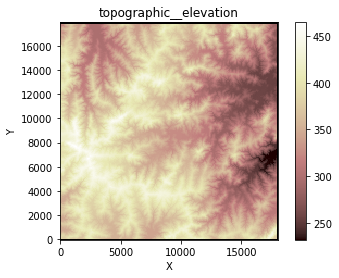

In [188]:
imshow_grid_at_node(mg,'topographic__elevation')

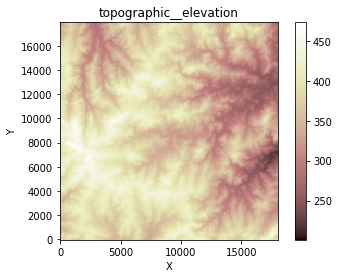

In [189]:
imshow_grid_at_node(mg_origin,'topographic__elevation')

In [19]:
mg.save('novo_asc.asc', names=['topographic__elevation'])